In [ ]:
import numpy as np

In [ ]:
from src.utils.data_loader import *

X_train, X_test, y_train, y_test = load_data()

X_train.min()

In [ ]:
from src.layers.Conv2D import Conv2D

i = X_train[0]
img = np.expand_dims(i, axis=0)
img.shape

In [ ]:
layer = Conv2D(1, 6, 5)
out = layer.forward(img)
out.shape

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(i[0], cmap='gray')

In [ ]:
import matplotlib.pyplot as plt

a = out[0]
a.shape

In [ ]:
fig, axes = plt.subplots(3,2, figsize = (20,15))

for i, ax in enumerate(axes.flat):
    ax.imshow(a[i], cmap ='gray')
    ax.set_title(f"Feature Map {i}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
out.min(), out.max()
out.shape

In [ ]:
from src.layers.SubSamplingLayer import SubSample
pool = SubSample(6, 2)
k = pool.forward(out)
k.shape

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3,2, figsize = (10,10))
m = k[0]
for i, ax in enumerate(axes.flat):
    ax.imshow(m[i], cmap='gray')
    ax.set_title(f"Feature Map {i}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
connection_table = [
            [0, 1, 2],        # map 0
            [1, 2, 3],        # map 1
            [2, 3, 4],        # map 2
            [3, 4, 5],        # map 3
            [0, 4, 5],        # map 4
            [1, 2, 5],        # map 5
            [0, 1, 3, 4],     # map 6
            [1, 2, 4, 5],     # map 7
            [0, 1, 2, 5],     # map 8
            [0, 2, 3, 5],     # map 9
            [1, 3, 4, 5],     # map 10
            [0, 1, 4, 5],     # map 11
            [0, 1, 2, 3],     # map 12
            [0, 1, 2, 3, 4],  # map 13
            [1, 2, 3, 4, 5],  # map 14
            [0, 1, 2, 3, 4, 5]  # map 15
        ]

In [ ]:
C3 = Conv2D(6, 16, 5, connection_table=connection_table)
C3_out = C3.forward(k)
C3_out.shape

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4,4, figsize = (10,10))
s = C3_out[0]
for i, ax in enumerate(axes.flat):
    ax.imshow(s[i], cmap ='gray')
    ax.set_title(f"Feature Map {i}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [76]:
S4 = SubSample(16, 2)
S4_out = S4.forward(C3_out)

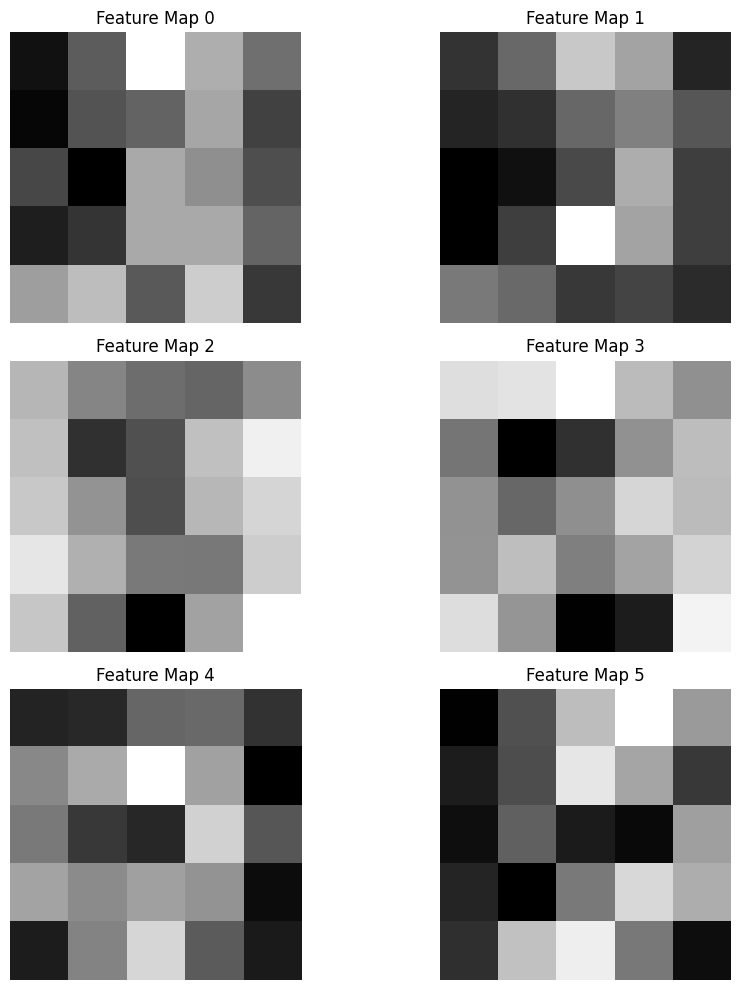

In [75]:
fig, axes = plt.subplots(3, 2, figsize = (10, 10))
m = S4_out[0]
for i, ax in enumerate(axes.flat):
    ax.imshow(m[i], cmap='gray')
    ax.set_title(f"Feature Map {i}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [66]:
C5 = Conv2D(16, 120, 5)
C5_out = C5.forward(S4_out)
l = C5_out[0]
l.reshape(1,-1).shape

(1, 120)

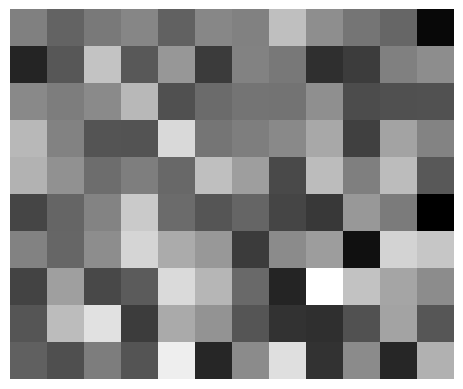

In [82]:
plt.imshow(l.reshape(10,12), cmap='gray', aspect='equal')
plt.axis('off')
plt.show()

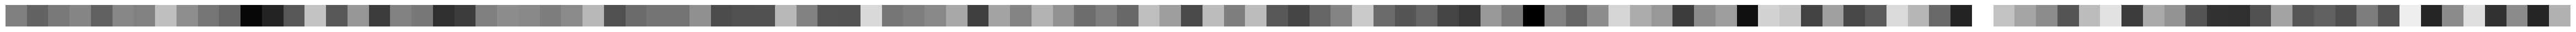

In [86]:
plt.figure(figsize=(60, 60))
plt.imshow(l.reshape(1,-1), cmap='gray', aspect='equal')
plt.axis('off')
plt.show()

In [87]:
from src.layers.Flatten import Flatten
F = Flatten()
F_1 = F.forward(C5_out)
F_1.shape

(1, 120)

In [98]:
from src.layers.Linear import Linear
from src.utils.ScaledTanh import ScaledTanh

tanh = ScaledTanh()

F6 = Linear(120, 84)
F6_out = F6.forward(F_1)
F6_out = tanh.forward(F6_out)

F6_out.shape

(1, 84)

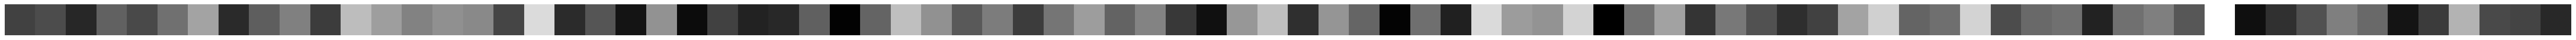

In [99]:
plt.figure(figsize=(70,70))
plt.imshow(F6_out.reshape(1, -1), cmap = 'gray', aspect='equal')
plt.axis('off')
plt.show()